In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Importing and Joining Data

####1.1 Loading the Listing and Summary Data

In [2]:
selected_columns = ['id', 'neighbourhood_cleansed', 'bedrooms','price','availability_30','availability_60','availability_90','availability_365']

In [3]:
l_2019_4 = pd.read_csv('/content/drive/MyDrive/DSO574/Assignment Data/AirBnB/Data Files [Detailed]/los_angeles_2019_04_listings.csv.gz', usecols=selected_columns)
l_2019_5 = pd.read_csv('/content/drive/MyDrive/DSO574/Assignment Data/AirBnB/Data Files [Detailed]/los_angeles_2019_05_listings.csv.gz', usecols=selected_columns)
l_2019_12 = pd.read_csv('/content/drive/MyDrive/DSO574/Assignment Data/AirBnB/Data Files [Detailed]/los_angeles_2019_12_listings.csv.gz', usecols=selected_columns)

l_2020_4 = pd.read_csv('/content/drive/MyDrive/DSO574/Assignment Data/AirBnB/Data Files [Detailed]/los_angeles_2020_04_listings.csv.gz', usecols=selected_columns)
l_2020_5 = pd.read_csv('/content/drive/MyDrive/DSO574/Assignment Data/AirBnB/Data Files [Detailed]/los_angeles_2020_05_listings.csv.gz', usecols=selected_columns)
l_2020_12 = pd.read_csv('/content/drive/MyDrive/DSO574/Assignment Data/AirBnB/Data Files [Detailed]/los_angeles_2020_12_listings.csv.gz', usecols=selected_columns)

In [4]:
summary = pd.read_csv('/content/drive/MyDrive/DSO574/Assignment Data/AirBnB/Combined Listing Data [Summary].csv')

<ipython-input-4-01c26f315378>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  summary = pd.read_csv('/content/drive/MyDrive/DSO574/Assignment Data/AirBnB/Combined Listing Data [Summary].csv')


In [5]:
l_2019_4.head()

,id,neighbourhood_cleansed,bedrooms,price,availability_30,availability_60,availability_90,availability_365
0,109,Culver City,2.0,$122.00,0,0,0,4
1,344,Burbank,3.0,$168.00,1,12,12,103
2,2708,Hollywood,1.0,$79.00,0,7,7,253
3,2732,Santa Monica,1.0,$140.00,7,37,67,342
4,2864,Bellflower,1.0,$80.00,0,0,0,0


In [6]:
summary.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,295,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,110,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,600,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv


In [7]:
summary_2019_4 = summary[(summary['neighbourhood'] == 'Downtown') & (summary['Scrape File'] == 'los_angeles_2019_04_listings.csv')]
summary_2019_5 = summary[(summary['neighbourhood'] == 'Downtown') & (summary['Scrape File'] == 'los_angeles_2019_05_listings.csv')]
summary_2019_12 = summary[(summary['neighbourhood'] == 'Downtown') & (summary['Scrape File'] == 'los_angeles_2019_12_listings.csv')]
summary_2020_4 = summary[(summary['neighbourhood'] == 'Downtown') & (summary['Scrape File'] == 'los_angeles_2020_04_listings.csv')]
summary_2020_5 = summary[(summary['neighbourhood'] == 'Downtown') & (summary['Scrape File'] == 'los_angeles_2020_05_listings.csv')]
summary_2020_12 = summary[(summary['neighbourhood'] == 'Downtown') & (summary['Scrape File'] == 'los_angeles_2020_12_listings.csv')]

In [8]:
summary_2019_4.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File
789136,84,43318,Arts District Private Room 212,57161,Jefferson,City of Los Angeles,Downtown,34.04852,-118.23693,Private room,45,2,72,2019-03-31,0.69,23,355.0,los_angeles_2019_04_listings.csv
789254,202,135608,Arts District Private Room 226,57161,Jefferson,City of Los Angeles,Downtown,34.04895,-118.23570,Private room,48,2,61,2019-03-19,0.66,23,359.0,los_angeles_2019_04_listings.csv
789279,227,164946,Arts District Private Room 234,57161,Jefferson,City of Los Angeles,Downtown,34.04795,-118.23709,Private room,45,2,48,2019-02-25,0.52,23,358.0,los_angeles_2019_04_listings.csv
789320,268,210904,Executive Luxury Loft at LUMA,1040342,Paula,City of Los Angeles,Downtown,34.04193,-118.26202,Entire home/apt,259,3,6,2017-06-03,0.07,2,359.0,los_angeles_2019_04_listings.csv
789527,475,393966,Historical Arts District,1969645,Tiger,City of Los Angeles,Downtown,34.04948,-118.23610,Private room,58,1,198,2019-03-21,2.34,1,272.0,los_angeles_2019_04_listings.csv


In [9]:
l_2019_4 = l_2019_4[(l_2019_4['neighbourhood_cleansed'] == 'Downtown')]
l_2019_5 = l_2019_5[(l_2019_5['neighbourhood_cleansed'] == 'Downtown')]
l_2019_12 = l_2019_12[(l_2019_12['neighbourhood_cleansed'] == 'Downtown')]
l_2020_4 = l_2020_4[(l_2020_4['neighbourhood_cleansed'] == 'Downtown')]
l_2020_5 = l_2020_5[(l_2020_5['neighbourhood_cleansed'] == 'Downtown')]
l_2020_12 = l_2020_12[(l_2020_12['neighbourhood_cleansed'] == 'Downtown')]

In [10]:
l_2019_4.head()

,id,neighbourhood_cleansed,bedrooms,price,availability_30,availability_60,availability_90,availability_365
84,43318,Downtown,1.0,$45.00,23,50,80,355
202,135608,Downtown,0.0,$48.00,24,54,84,359
227,164946,Downtown,1.0,$45.00,23,53,83,358
268,210904,Downtown,1.0,$259.00,30,60,87,359
475,393966,Downtown,1.0,$58.00,10,30,50,272


In [11]:
summary_2019_4['date'] = summary_2019_4['Scrape File'].str.extract(r'_(\d{4}_\d{2})_listings\.csv')
summary_2019_5['date'] = summary_2019_5['Scrape File'].str.extract(r'_(\d{4}_\d{2})_listings\.csv')
summary_2019_12['date'] = summary_2019_12['Scrape File'].str.extract(r'_(\d{4}_\d{2})_listings\.csv')

summary_2020_4['date'] = summary_2020_4['Scrape File'].str.extract(r'_(\d{4}_\d{2})_listings\.csv')
summary_2020_5['date'] = summary_2020_5['Scrape File'].str.extract(r'_(\d{4}_\d{2})_listings\.csv')
summary_2020_12['date'] = summary_2020_12['Scrape File'].str.extract(r'_(\d{4}_\d{2})_listings\.csv')

<ipython-input-11-3521813066f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_2019_4['date'] = summary_2019_4['Scrape File'].str.extract(r'_(\d{4}_\d{2})_listings\.csv')
<ipython-input-11-3521813066f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_2019_5['date'] = summary_2019_5['Scrape File'].str.extract(r'_(\d{4}_\d{2})_listings\.csv')
<ipython-input-11-3521813066f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

####1.2 Joining Data

In [12]:
joined_2019_4 = pd.merge(summary_2019_4, l_2019_4, on='id', how='inner')
joined_2019_5 = pd.merge(summary_2019_5, l_2019_5, on='id', how='inner')
joined_2019_12 = pd.merge(summary_2019_12, l_2019_12, on='id', how='inner')
joined_2020_4 = pd.merge(summary_2020_4, l_2020_4, on='id', how='inner')
joined_2020_5 = pd.merge(summary_2020_5, l_2020_5, on='id', how='inner')
joined_2020_12 = pd.merge(summary_2020_12, l_2020_12, on='id', how='inner')

In [13]:
joined_2019_4.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,availability_365_x,Scrape File,date,neighbourhood_cleansed,bedrooms,price_y,availability_30,availability_60,availability_90,availability_365_y
0,84,43318,Arts District Private Room 212,57161,Jefferson,City of Los Angeles,Downtown,34.04852,-118.23693,Private room,...,355.0,los_angeles_2019_04_listings.csv,2019_04,Downtown,1.0,$45.00,23,50,80,355
1,202,135608,Arts District Private Room 226,57161,Jefferson,City of Los Angeles,Downtown,34.04895,-118.23570,Private room,...,359.0,los_angeles_2019_04_listings.csv,2019_04,Downtown,0.0,$48.00,24,54,84,359
2,227,164946,Arts District Private Room 234,57161,Jefferson,City of Los Angeles,Downtown,34.04795,-118.23709,Private room,...,358.0,los_angeles_2019_04_listings.csv,2019_04,Downtown,1.0,$45.00,23,53,83,358
3,268,210904,Executive Luxury Loft at LUMA,1040342,Paula,City of Los Angeles,Downtown,34.04193,-118.26202,Entire home/apt,...,359.0,los_angeles_2019_04_listings.csv,2019_04,Downtown,1.0,$259.00,30,60,87,359
4,475,393966,Historical Arts District,1969645,Tiger,City of Los Angeles,Downtown,34.04948,-118.23610,Private room,...,272.0,los_angeles_2019_04_listings.csv,2019_04,Downtown,1.0,$58.00,10,30,50,272


In [14]:
joined_df = pd.concat([joined_2019_4, joined_2019_5, joined_2019_12, joined_2020_4, joined_2020_5, joined_2020_12], ignore_index=True)

In [15]:
joined_df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,availability_365_x,Scrape File,date,neighbourhood_cleansed,bedrooms,price_y,availability_30,availability_60,availability_90,availability_365_y
0,84,43318,Arts District Private Room 212,57161,Jefferson,City of Los Angeles,Downtown,34.04852,-118.23693,Private room,...,355.0,los_angeles_2019_04_listings.csv,2019_04,Downtown,1.0,$45.00,23,50,80,355
1,202,135608,Arts District Private Room 226,57161,Jefferson,City of Los Angeles,Downtown,34.04895,-118.23570,Private room,...,359.0,los_angeles_2019_04_listings.csv,2019_04,Downtown,0.0,$48.00,24,54,84,359
2,227,164946,Arts District Private Room 234,57161,Jefferson,City of Los Angeles,Downtown,34.04795,-118.23709,Private room,...,358.0,los_angeles_2019_04_listings.csv,2019_04,Downtown,1.0,$45.00,23,53,83,358
3,268,210904,Executive Luxury Loft at LUMA,1040342,Paula,City of Los Angeles,Downtown,34.04193,-118.26202,Entire home/apt,...,359.0,los_angeles_2019_04_listings.csv,2019_04,Downtown,1.0,$259.00,30,60,87,359
4,475,393966,Historical Arts District,1969645,Tiger,City of Los Angeles,Downtown,34.04948,-118.23610,Private room,...,272.0,los_angeles_2019_04_listings.csv,2019_04,Downtown,1.0,$58.00,10,30,50,272


####1.3 Keeping Variables of Interest

In [16]:
joined_df = joined_df[['id', 'neighbourhood_cleansed', 'bedrooms','price_y','availability_30','availability_60','availability_90','availability_365_y', 'date']]

In [17]:
joined_df.head()

,id,neighbourhood_cleansed,bedrooms,price_y,availability_30,availability_60,availability_90,availability_365_y,date
0,43318,Downtown,1.0,$45.00,23,50,80,355,2019_04
1,135608,Downtown,0.0,$48.00,24,54,84,359,2019_04
2,164946,Downtown,1.0,$45.00,23,53,83,358,2019_04
3,210904,Downtown,1.0,$259.00,30,60,87,359,2019_04
4,393966,Downtown,1.0,$58.00,10,30,50,272,2019_04


####1.4 Dealing with Missing Values

In [18]:
joined_df.shape

(8531, 9)

In [19]:
missing_values_per_column = joined_df.isnull().sum()
missing_values_per_column

id                          0
neighbourhood_cleansed      0
bedrooms                  210
price_y                     0
availability_30             0
availability_60             0
availability_90             0
availability_365_y          0
date                        0
dtype: int64

In [20]:
joined_df.describe()

,id,bedrooms,availability_30,availability_60,availability_90,availability_365_y
count,8.531000e+03,8321.000000,8531.000000,8531.000000,8531.000000,8531.000000
mean,2.636625e+07,1.069703,13.913726,31.169148,48.931309,165.630524
std,1.141937e+07,0.689514,12.034507,23.711061,35.435280,137.286351
min,4.331800e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.867672e+07,1.000000,0.000000,1.000000,3.000000,22.000000
50%,2.783532e+07,1.000000,13.000000,35.000000,59.000000,154.000000
75%,3.413009e+07,1.000000,27.000000,55.000000,84.000000,315.000000
max,4.701698e+07,7.000000,30.000000,60.000000,90.000000,365.000000


In [21]:
# We are only interested in bedroom < 3 rows
joined_df1 = joined_df[(joined_df['bedrooms']<=3)| (joined_df['bedrooms'].isnull())]

In [22]:
joined_df1.shape

(8513, 9)

In [23]:
joined_df1.describe()

,id,bedrooms,availability_30,availability_60,availability_90,availability_365_y
count,8.513000e+03,8303.000000,8513.000000,8513.000000,8513.000000,8513.000000
mean,2.635005e+07,1.062989,13.907083,31.160108,48.922824,165.532597
std,1.141371e+07,0.674237,12.033531,23.707384,35.428460,137.255221
min,4.331800e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.865533e+07,1.000000,0.000000,1.000000,3.000000,22.000000
50%,2.783452e+07,1.000000,13.000000,35.000000,59.000000,154.000000
75%,3.411524e+07,1.000000,27.000000,55.000000,84.000000,315.000000
max,4.701698e+07,3.000000,30.000000,60.000000,90.000000,365.000000


In [24]:
missing_values_per_column = joined_df1.isnull().sum()
missing_values_per_column

id                          0
neighbourhood_cleansed      0
bedrooms                  210
price_y                     0
availability_30             0
availability_60             0
availability_90             0
availability_365_y          0
date                        0
dtype: int64

In [25]:
joined_df1['bedrooms'].fillna(1, inplace=True)

joined_df1.head()

<ipython-input-25-188767acd3be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df1['bedrooms'].fillna(1, inplace=True)


,id,neighbourhood_cleansed,bedrooms,price_y,availability_30,availability_60,availability_90,availability_365_y,date
0,43318,Downtown,1.0,$45.00,23,50,80,355,2019_04
1,135608,Downtown,0.0,$48.00,24,54,84,359,2019_04
2,164946,Downtown,1.0,$45.00,23,53,83,358,2019_04
3,210904,Downtown,1.0,$259.00,30,60,87,359,2019_04
4,393966,Downtown,1.0,$58.00,10,30,50,272,2019_04


In [26]:
missing_values_per_column = joined_df1.isnull().sum()
missing_values_per_column

id                        0
neighbourhood_cleansed    0
bedrooms                  0
price_y                   0
availability_30           0
availability_60           0
availability_90           0
availability_365_y        0
date                      0
dtype: int64

####1.5 Clean Column Names & Change Data Type

In [27]:

joined_df1['date'] = joined_df1['date'].str.replace('_', '-')

<ipython-input-27-8cd40f771ea7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df1['date'] = joined_df1['date'].str.replace('_', '-')


In [28]:
joined_df1.head()

,id,neighbourhood_cleansed,bedrooms,price_y,availability_30,availability_60,availability_90,availability_365_y,date
0,43318,Downtown,1.0,$45.00,23,50,80,355,2019-04
1,135608,Downtown,0.0,$48.00,24,54,84,359,2019-04
2,164946,Downtown,1.0,$45.00,23,53,83,358,2019-04
3,210904,Downtown,1.0,$259.00,30,60,87,359,2019-04
4,393966,Downtown,1.0,$58.00,10,30,50,272,2019-04


In [29]:
df1 = joined_df1.copy()

df1['price'] = df1['price_y']
df1['availability_365'] = df1['availability_365_y']

df1.drop(columns=['price_y'], inplace=True)
df1.drop(columns=['availability_365_y'], inplace=True)

In [30]:
df1.head()

,id,neighbourhood_cleansed,bedrooms,availability_30,availability_60,availability_90,date,price,availability_365
0,43318,Downtown,1.0,23,50,80,2019-04,$45.00,355
1,135608,Downtown,0.0,24,54,84,2019-04,$48.00,359
2,164946,Downtown,1.0,23,53,83,2019-04,$45.00,358
3,210904,Downtown,1.0,30,60,87,2019-04,$259.00,359
4,393966,Downtown,1.0,10,30,50,2019-04,$58.00,272


1.5.1 Changing Data Type

In [31]:
df1['date'].dtype

dtype('O')

In [32]:
df1['date'] = pd.to_datetime(df1['date'])

In [33]:
# Remove commas and dollar signs from 'price' column
df1['price'] = df1['price'].str.replace(',', '').str.replace('$', '')

# Convert 'price' column to float
df1['price'] = df1['price'].astype(float)

<ipython-input-33-a995ae205629>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['price'] = df1['price'].str.replace(',', '').str.replace('$', '')


In [34]:
df1.head()

,id,neighbourhood_cleansed,bedrooms,availability_30,availability_60,availability_90,date,price,availability_365
0,43318,Downtown,1.0,23,50,80,2019-04-01,45.0,355
1,135608,Downtown,0.0,24,54,84,2019-04-01,48.0,359
2,164946,Downtown,1.0,23,53,83,2019-04-01,45.0,358
3,210904,Downtown,1.0,30,60,87,2019-04-01,259.0,359
4,393966,Downtown,1.0,10,30,50,2019-04-01,58.0,272


##2. Exploratory Data Analysis

In [35]:
df = df1.copy()

In [36]:
df.describe()

,id,bedrooms,availability_30,availability_60,availability_90,price,availability_365
count,8.513000e+03,8513.000000,8513.000000,8513.000000,8513.000000,8513.000000,8513.000000
mean,2.635005e+07,1.061435,13.907083,31.160108,48.922824,225.773875,165.532597
std,1.141371e+07,0.665940,12.033531,23.707384,35.428460,641.588365,137.255221
min,4.331800e+04,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,1.865533e+07,1.000000,0.000000,1.000000,3.000000,99.000000,22.000000
50%,2.783452e+07,1.000000,13.000000,35.000000,59.000000,140.000000,154.000000
75%,3.411524e+07,1.000000,27.000000,55.000000,84.000000,200.000000,315.000000
max,4.701698e+07,3.000000,30.000000,60.000000,90.000000,10000.000000,365.000000


In [37]:
df.head()

,id,neighbourhood_cleansed,bedrooms,availability_30,availability_60,availability_90,date,price,availability_365
0,43318,Downtown,1.0,23,50,80,2019-04-01,45.0,355
1,135608,Downtown,0.0,24,54,84,2019-04-01,48.0,359
2,164946,Downtown,1.0,23,53,83,2019-04-01,45.0,358
3,210904,Downtown,1.0,30,60,87,2019-04-01,259.0,359
4,393966,Downtown,1.0,10,30,50,2019-04-01,58.0,272


In [38]:
df['date'].dtype

dtype('<M8[ns]')

In [39]:
df['date'] = pd.to_datetime(df['date'])

#df['date'] = df['date'].dt.strftime('%Y-%m')

####2.1 Checking the Distribution for Price

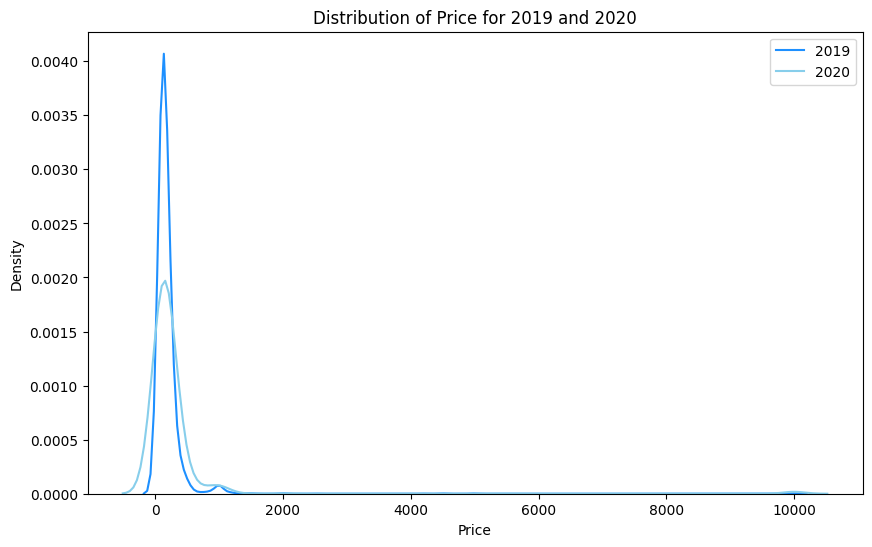

In [40]:
plt.figure(figsize=(10, 6))

# Filter data for 2019 and 2020
df_2019 = df[df['date'].dt.year == 2019]
df_2020 = df[df['date'].dt.year == 2020]

sns.kdeplot(df_2019['price'], color='dodgerblue',label='2019')  # Distribution plot for 2019
sns.kdeplot(df_2020['price'],color='skyblue', label='2020')   # Distribution plot for 2020

# Add title and labels
plt.title('Distribution of Price for 2019 and 2020')
plt.xlabel('Price')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

####2.2 Checking the Distribution for availability_30

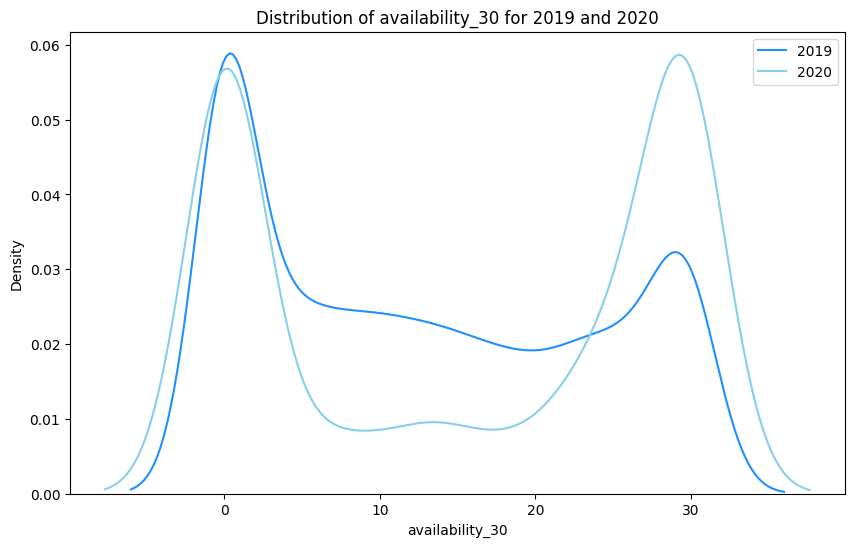

In [41]:

plt.figure(figsize=(10, 6))

# Filter data for 2019 and 2020
df_2019 = df[df['date'].dt.year == 2019]
df_2020 = df[df['date'].dt.year == 2020]

sns.kdeplot(df_2019['availability_30'], color='dodgerblue', label='2019')  # Distribution plot for 2019
sns.kdeplot(df_2020['availability_30'], color='skyblue', label='2020')   # Distribution plot for 2020

# Add title and labels
plt.title('Distribution of availability_30 for 2019 and 2020')
plt.xlabel('availability_30')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

####2.3 Checking the Distribution for availability_60

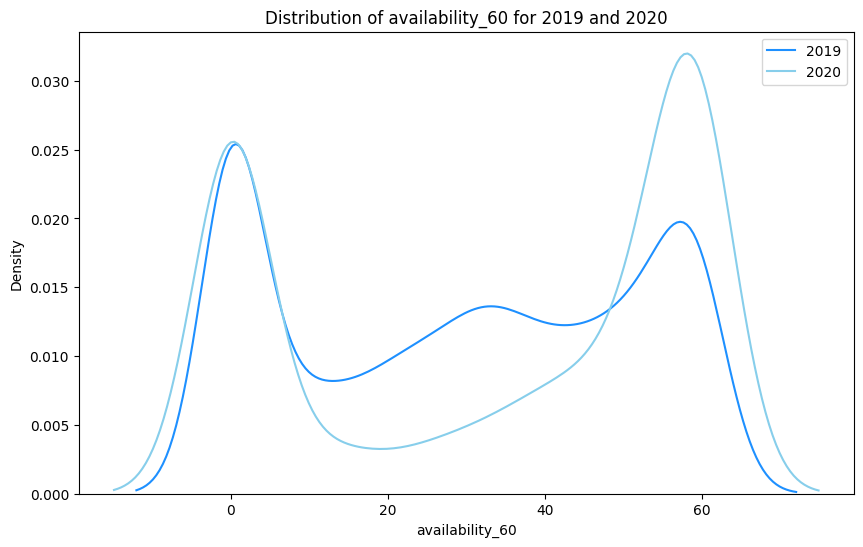

In [42]:

plt.figure(figsize=(10, 6))

# Filter data for 2019 and 2020
df_2019 = df[df['date'].dt.year == 2019]
df_2020 = df[df['date'].dt.year == 2020]

sns.kdeplot(df_2019['availability_60'], color='dodgerblue', label='2019')  # Distribution plot for 2019
sns.kdeplot(df_2020['availability_60'], color='skyblue', label='2020')   # Distribution plot for 2020

# Add title and labels
plt.title('Distribution of availability_60 for 2019 and 2020')
plt.xlabel('availability_60')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

####2.4 Checking the Distribution for availability_90

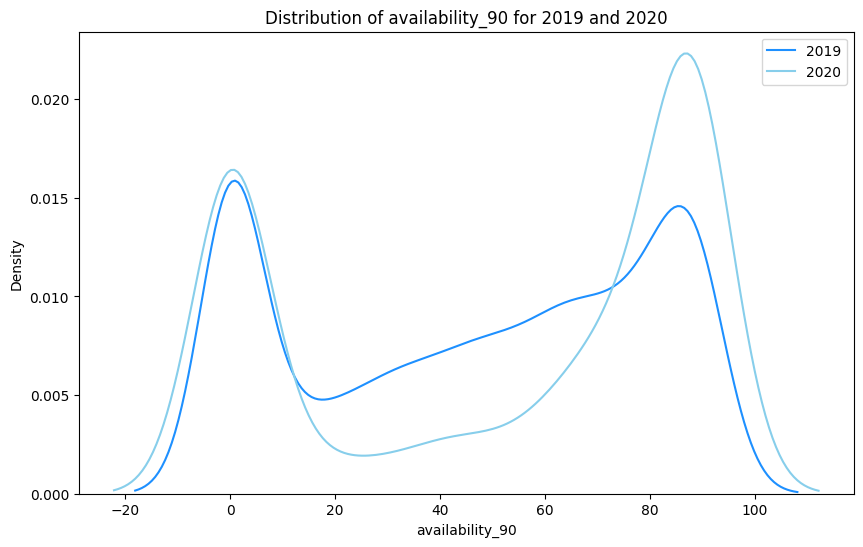

In [43]:
plt.figure(figsize=(10, 6))

# Filter data for 2019 and 2020
df_2019 = df[df['date'].dt.year == 2019]
df_2020 = df[df['date'].dt.year == 2020]

sns.kdeplot(df_2019['availability_90'], color='dodgerblue', label='2019')  # Distribution plot for 2019
sns.kdeplot(df_2020['availability_90'], color='skyblue', label='2020')   # Distribution plot for 2020

# Add title and labels
plt.title('Distribution of availability_90 for 2019 and 2020')
plt.xlabel('availability_90')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

####2.5 Checking the Distribution for availability_365

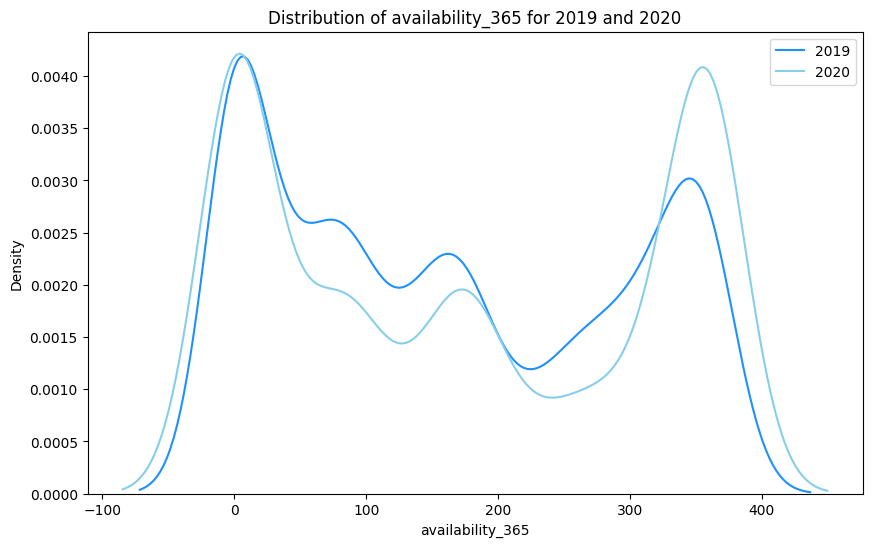

In [44]:
plt.figure(figsize=(10, 6))

# Filter data for 2019 and 2020
df_2019 = df[df['date'].dt.year == 2019]
df_2020 = df[df['date'].dt.year == 2020]

sns.kdeplot(df_2019['availability_365'], color='dodgerblue', label='2019')  # Distribution plot for 2019
sns.kdeplot(df_2020['availability_365'], color='skyblue', label='2020')   # Distribution plot for 2020

# Add title and labels
plt.title('Distribution of availability_365 for 2019 and 2020')
plt.xlabel('availability_365')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

2.6 Dealing with Outliers

In [45]:
df = df[df['price']<=2000]

##3. Analysis

In [46]:
df.describe()

,id,bedrooms,availability_30,availability_60,availability_90,price,availability_365
count,8.471000e+03,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000
mean,2.630225e+07,1.061268,13.919844,31.178137,48.941329,183.971078,165.405855
std,1.140561e+07,0.666202,12.027892,23.699970,35.416763,172.652998,137.087807
min,4.331800e+04,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,1.863258e+07,1.000000,0.000000,1.000000,3.000000,99.000000,22.000000
50%,2.783037e+07,1.000000,13.000000,35.000000,59.000000,140.000000,154.000000
75%,3.406890e+07,1.000000,27.000000,55.000000,84.000000,200.000000,314.000000
max,4.701698e+07,3.000000,30.000000,60.000000,90.000000,2000.000000,365.000000


In [47]:
df.head()

,id,neighbourhood_cleansed,bedrooms,availability_30,availability_60,availability_90,date,price,availability_365
0,43318,Downtown,1.0,23,50,80,2019-04-01,45.0,355
1,135608,Downtown,0.0,24,54,84,2019-04-01,48.0,359
2,164946,Downtown,1.0,23,53,83,2019-04-01,45.0,358
3,210904,Downtown,1.0,30,60,87,2019-04-01,259.0,359
4,393966,Downtown,1.0,10,30,50,2019-04-01,58.0,272


###3.1 Number of Listings

<ipython-input-48-58616b6f190b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = pd.to_datetime(df['date']).dt.to_period('M')


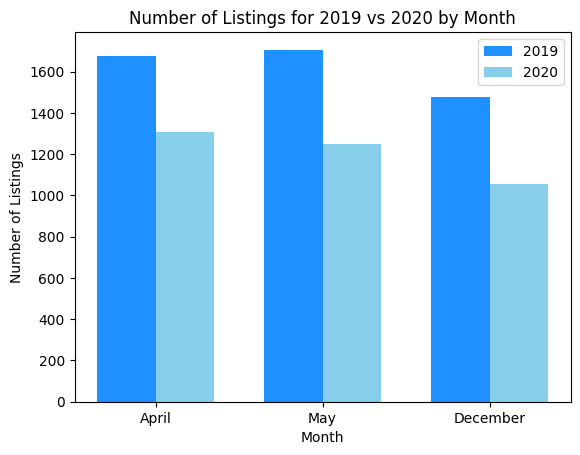

In [48]:
# Extract year and month from 'date' column
df['year_month'] = pd.to_datetime(df['date']).dt.to_period('M')

# Filter data for each month in 2019 and 2020
april_2019 = df[df['year_month'] == '2019-04']
april_2020 = df[df['year_month'] == '2020-04']
may_2019 = df[df['year_month'] == '2019-05']
may_2020 = df[df['year_month'] == '2020-05']
dec_2019 = df[df['year_month'] == '2019-12']
dec_2020 = df[df['year_month'] == '2020-12']

# Count the number of IDs for each month in 2019 and 2020
counts_2019 = [len(april_2019), len(may_2019), len(dec_2019)]
counts_2020 = [len(april_2020), len(may_2020), len(dec_2020)]

# Create side-by-side bar chart
months = ['April', 'May', 'December']
bar_width = 0.35
index = range(len(months))

plt.bar(index, counts_2019, bar_width, label='2019', color='dodgerblue')
plt.bar([i + bar_width for i in index], counts_2020, bar_width, label='2020', color='skyblue')

# Add title and labels
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.title('Number of Listings for 2019 vs 2020 by Month')
plt.xticks([i + bar_width / 2 for i in index], months)

# Add legend
plt.legend()

# Show plot
plt.show()

###3.2 Price

<Figure size 1000x600 with 0 Axes>

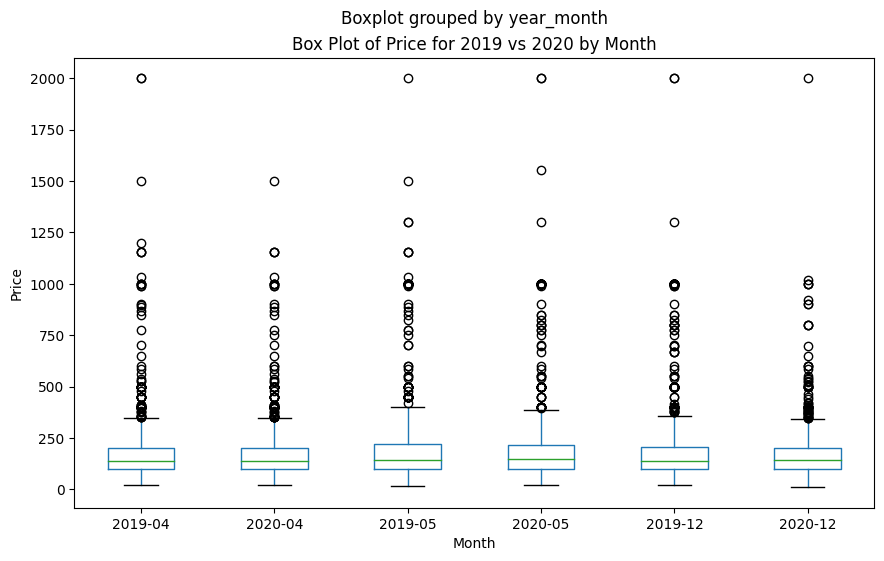

In [49]:
# Specify the order of dates
order = ['2019-04', '2020-04', '2019-05', '2020-05', '2019-12', '2020-12']

# Create box plot with specified order
plt.figure(figsize=(10, 6))
positions = range(1, len(order) + 1)
df.boxplot(column='price', by='year_month', figsize=(10, 6), grid=False, positions=positions)

# Add title and labels
plt.title('Box Plot of Price for 2019 vs 2020 by Month')
plt.xlabel('Month')
plt.ylabel('Price')

# Update x-axis tick labels
plt.xticks(positions, order)

# Show plot
plt.show()

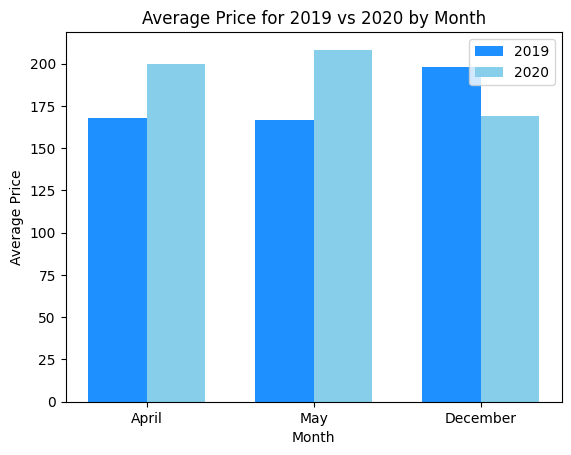

In [50]:
# Group by 'year_month' and calculate average price for each group
avg_prices = df.groupby('year_month')['price'].mean()

# Extract average prices for each month in 2019 and 2020
avg_prices_2019 = avg_prices[avg_prices.index.year == 2019]
avg_prices_2020 = avg_prices[avg_prices.index.year == 2020]

# Create side-by-side bar chart
months = ['April', 'May', 'December']
bar_width = 0.35
index = range(len(months))

plt.bar(index, avg_prices_2019, bar_width, label='2019', color='dodgerblue')
plt.bar([i + bar_width for i in index], avg_prices_2020, bar_width, label='2020', color='skyblue')

# Add title and labels
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price for 2019 vs 2020 by Month')
plt.xticks([i + bar_width / 2 for i in index], months)

# Add legend
plt.legend()

# Show plot
plt.show()

####3.2.1 T-test for Price

In [51]:
#compare 2019-04 and 2020-04
from scipy.stats import ttest_ind

# Filter for May 2019
april_2019_prices = df[(df['date'].dt.year == 2019) & (df['date'].dt.month == 4)]['price']
april_2020_prices = df[(df['date'].dt.year == 2020) & (df['date'].dt.month == 4)]['price']

# Perform t-test
t_statistic, p_value = ttest_ind(april_2019_prices, april_2020_prices)
print("T-statistic: ", t_statistic)
print("p-value: ", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference between the means.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic:  -5.054286780963805
p-value:  4.5806565352799204e-07
Reject the null hypothesis: There is a significant difference between the means.


In [52]:
#compare 2019-05 and 2020-05

# Filter for May 2019
may_2019_prices = df[(df['date'].dt.year == 2019) & (df['date'].dt.month == 5)]['price']
may_2020_prices = df[(df['date'].dt.year == 2020) & (df['date'].dt.month == 5)]['price']

# Perform t-test
t_statistic, p_value = ttest_ind(may_2019_prices, may_2020_prices)
print("T-statistic: ", t_statistic)
print("p-value: ", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference between the means.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic:  -6.521670323374769
p-value:  8.148391225798437e-11
Reject the null hypothesis: There is a significant difference between the means.


In [53]:
#compare 2019-12 and 2020-12

# Filter for May 2019
may_2019_prices = df[(df['date'].dt.year == 2019) & (df['date'].dt.month == 5)]['price']
may_2020_prices = df[(df['date'].dt.year == 2020) & (df['date'].dt.month == 5)]['price']

# Perform t-test
t_statistic, p_value = ttest_ind(may_2019_prices, may_2020_prices)
print("T-statistic: ", t_statistic)
print("p-value: ", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference between the means.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic:  -6.521670323374769
p-value:  8.148391225798437e-11
Reject the null hypothesis: There is a significant difference between the means.


###3.3 Availability

####3.3.1 Availability_30

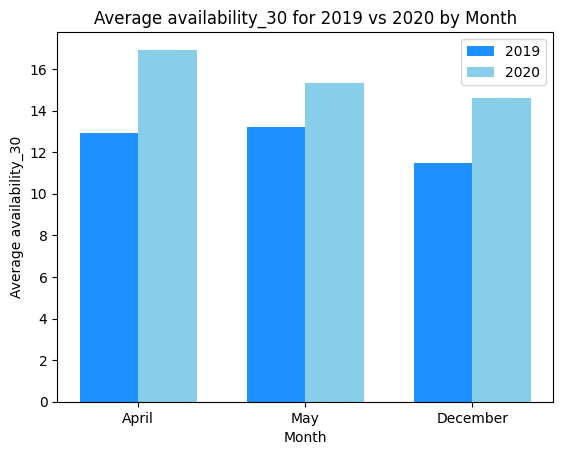

In [54]:
# Group by 'year_month' and calculate average price for each group
avg_prices = df.groupby('year_month')['availability_30'].mean()

# Extract average prices for each month in 2019 and 2020
avg_prices_2019 = avg_prices[avg_prices.index.year == 2019]
avg_prices_2020 = avg_prices[avg_prices.index.year == 2020]

# Create side-by-side bar chart
months = ['April', 'May', 'December']
bar_width = 0.35
index = range(len(months))

plt.bar(index, avg_prices_2019, bar_width, label='2019', color='dodgerblue')
plt.bar([i + bar_width for i in index], avg_prices_2020, bar_width, label='2020', color='skyblue')

# Add title and labels
plt.xlabel('Month')
plt.ylabel('Average availability_30')
plt.title('Average availability_30 for 2019 vs 2020 by Month')
plt.xticks([i + bar_width / 2 for i in index], months)

# Add legend
plt.legend()

# Show plot
plt.show()

####3.3.2 Availability_60

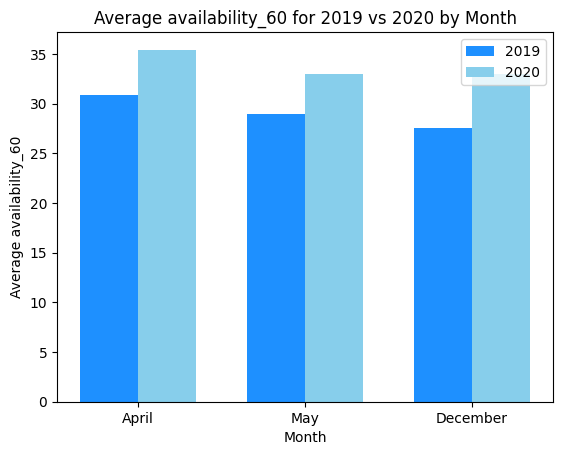

In [55]:
# Group by 'year_month' and calculate average price for each group
avg_prices = df.groupby('year_month')['availability_60'].mean()

# Extract average prices for each month in 2019 and 2020
avg_prices_2019 = avg_prices[avg_prices.index.year == 2019]
avg_prices_2020 = avg_prices[avg_prices.index.year == 2020]

# Create side-by-side bar chart
months = ['April', 'May', 'December']
bar_width = 0.35
index = range(len(months))

plt.bar(index, avg_prices_2019, bar_width, label='2019', color='dodgerblue')
plt.bar([i + bar_width for i in index], avg_prices_2020, bar_width, label='2020', color='skyblue')

# Add title and labels
plt.xlabel('Month')
plt.ylabel('Average availability_60')
plt.title('Average availability_60 for 2019 vs 2020 by Month')
plt.xticks([i + bar_width / 2 for i in index], months)

# Add legend
plt.legend()

# Show plot
plt.show()

####3.3.3 Availability_90

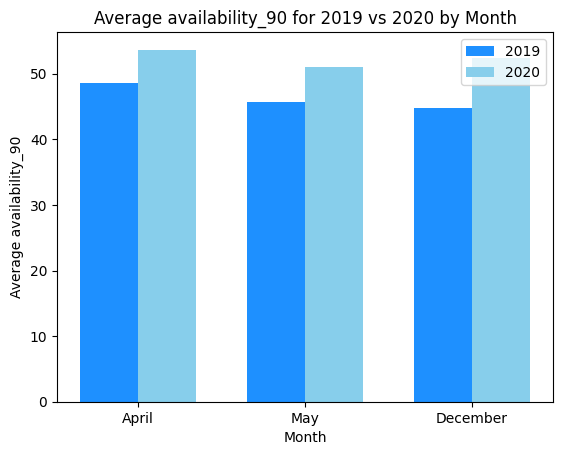

In [56]:
# Group by 'year_month' and calculate average price for each group
avg_prices = df.groupby('year_month')['availability_90'].mean()

# Extract average prices for each month in 2019 and 2020
avg_prices_2019 = avg_prices[avg_prices.index.year == 2019]
avg_prices_2020 = avg_prices[avg_prices.index.year == 2020]

# Create side-by-side bar chart
months = ['April', 'May', 'December']
bar_width = 0.35
index = range(len(months))

plt.bar(index, avg_prices_2019, bar_width, label='2019', color='dodgerblue')
plt.bar([i + bar_width for i in index], avg_prices_2020, bar_width, label='2020', color='skyblue')

# Add title and labels
plt.xlabel('Month')
plt.ylabel('Average availability_90')
plt.title('Average availability_90 for 2019 vs 2020 by Month')
plt.xticks([i + bar_width / 2 for i in index], months)

# Add legend
plt.legend()

# Show plot
plt.show()

####3.3.4 Availability_365

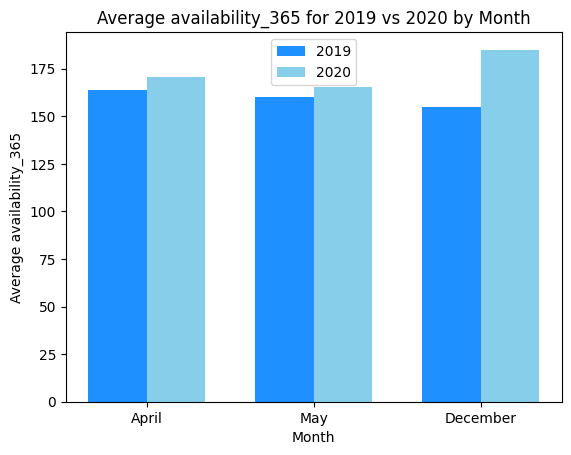

In [57]:
# Group by 'year_month' and calculate average price for each group
avg_prices = df.groupby('year_month')['availability_365'].mean()

# Extract average prices for each month in 2019 and 2020
avg_prices_2019 = avg_prices[avg_prices.index.year == 2019]
avg_prices_2020 = avg_prices[avg_prices.index.year == 2020]

# Create side-by-side bar chart
months = ['April', 'May', 'December']
bar_width = 0.35
index = range(len(months))

plt.bar(index, avg_prices_2019, bar_width, label='2019', color='dodgerblue')
plt.bar([i + bar_width for i in index], avg_prices_2020, bar_width, label='2020', color='skyblue')

# Add title and labels
plt.xlabel('Month')
plt.ylabel('Average availability_365')
plt.title('Average availability_365 for 2019 vs 2020 by Month')
plt.xticks([i + bar_width / 2 for i in index], months)

# Add legend
plt.legend()

# Show plot
plt.show()